In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('waterQuality1.csv')

In [4]:
# Verifying the data and the columns names
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [13]:
# Converting object to numeric
df['is_safe'] = pd.to_numeric(df['is_safe'], errors='coerce')
df['ammonia'] = pd.to_numeric(df['ammonia'], errors='coerce')
# Drop rows with NaN Values
df.dropna( subset=['ammonia', 'is_safe'], axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [31]:
# Checking the quantity of NaN values
df.isnull().sum()

aluminium          0
ammonia            0
arsenic            0
barium             0
cadmium            0
chloramine         0
chromium           0
copper             0
flouride           0
bacteria           0
viruses            0
lead               0
nitrates           0
nitrites           0
mercury            0
perchlorate        0
radium             0
selenium           0
silver             0
uranium            0
is_safe            0
is_safe_numeric    0
dtype: int64

In [14]:
# Verifying the quantity of each class in column 'is_safe'
counts = df['is_safe'].value_counts()
print(counts)

is_safe
0.0    7084
1.0     912
Name: count, dtype: int64


In [19]:
# Get a sample of the class 0 with the same quantity of class 1
c_0 = df[df.is_safe == 0].sample(n = 912, random_state=1)
c_1 = df[df.is_safe == 1]
# Concatenating the dataframes
df = pd.concat([c_0, c_1])
df = df.reset_index(drop=True)
# Recounting the classes
counts = df['is_safe'].value_counts()
print(counts)

is_safe
0.0    912
1.0    912
Name: count, dtype: int64


In [32]:
# Exploring the data
df.corr()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe,is_safe_numeric
aluminium,1.000000,0.030604,-0.022992,0.277128,-0.321764,0.344916,0.340642,0.208045,-0.020792,0.005465,...,-0.038093,0.272704,0.026401,0.264217,0.263936,0.003384,0.346948,0.046459,0.457355,0.030604
ammonia,0.030604,1.000000,0.060678,0.057452,0.009415,0.051445,0.089425,-0.009421,-0.009371,0.065444,...,-0.000339,-0.021838,0.046221,-0.011066,0.024566,0.027319,0.025240,-0.005492,-0.013835,1.000000
arsenic,-0.022992,0.060678,1.000000,0.254509,0.460718,0.196084,0.185956,-0.069427,-0.002928,0.052944,...,0.053863,0.251119,-0.041615,0.252221,0.091643,-0.010686,0.086797,-0.052410,-0.219455,0.060678
barium,0.277128,0.057452,0.254509,1.000000,-0.085439,0.349956,0.323815,0.073725,-0.026949,0.102785,...,-0.024137,0.321851,-0.005163,0.383084,0.232256,0.051589,0.317651,-0.054371,0.168629,0.057452
cadmium,-0.321764,0.009415,0.460718,-0.085439,1.000000,-0.241654,-0.236443,-0.164879,0.011916,-0.071855,...,0.044698,-0.103929,0.007990,-0.154284,-0.174706,-0.011876,-0.261713,-0.048678,-0.428699,0.009415
chloramine,0.344916,0.051445,0.196084,0.349956,-0.241654,1.000000,0.456245,0.160170,0.024107,0.189592,...,-0.000826,0.402410,-0.060038,0.456826,0.334949,-0.017882,0.368205,-0.044699,0.300432,0.051445
chromium,0.340642,0.089425,0.185956,0.323815,-0.236443,0.456245,1.000000,0.155463,0.015351,0.136983,...,-0.014447,0.367723,-0.010599,0.422798,0.249883,0.048599,0.415172,-0.024655,0.270905,0.089425
copper,0.208045,-0.009421,-0.069427,0.073725,-0.164879,0.160170,0.155463,1.000000,0.021204,0.112348,...,-0.005281,0.192102,0.026453,0.118944,0.096262,0.022204,0.136266,0.010264,0.062465,-0.009421
flouride,-0.020792,-0.009371,-0.002928,-0.026949,0.011916,0.024107,0.015351,0.021204,1.000000,0.063294,...,-0.016682,-0.012779,-0.005977,-0.023285,0.023113,0.049630,0.018807,0.034747,0.010305,-0.009371
bacteria,0.005465,0.065444,0.052944,0.102785,-0.071855,0.189592,0.136983,0.112348,0.063294,1.000000,...,0.005835,0.222617,-0.009567,0.157898,0.079955,0.004127,0.132703,0.034856,-0.039116,0.065444


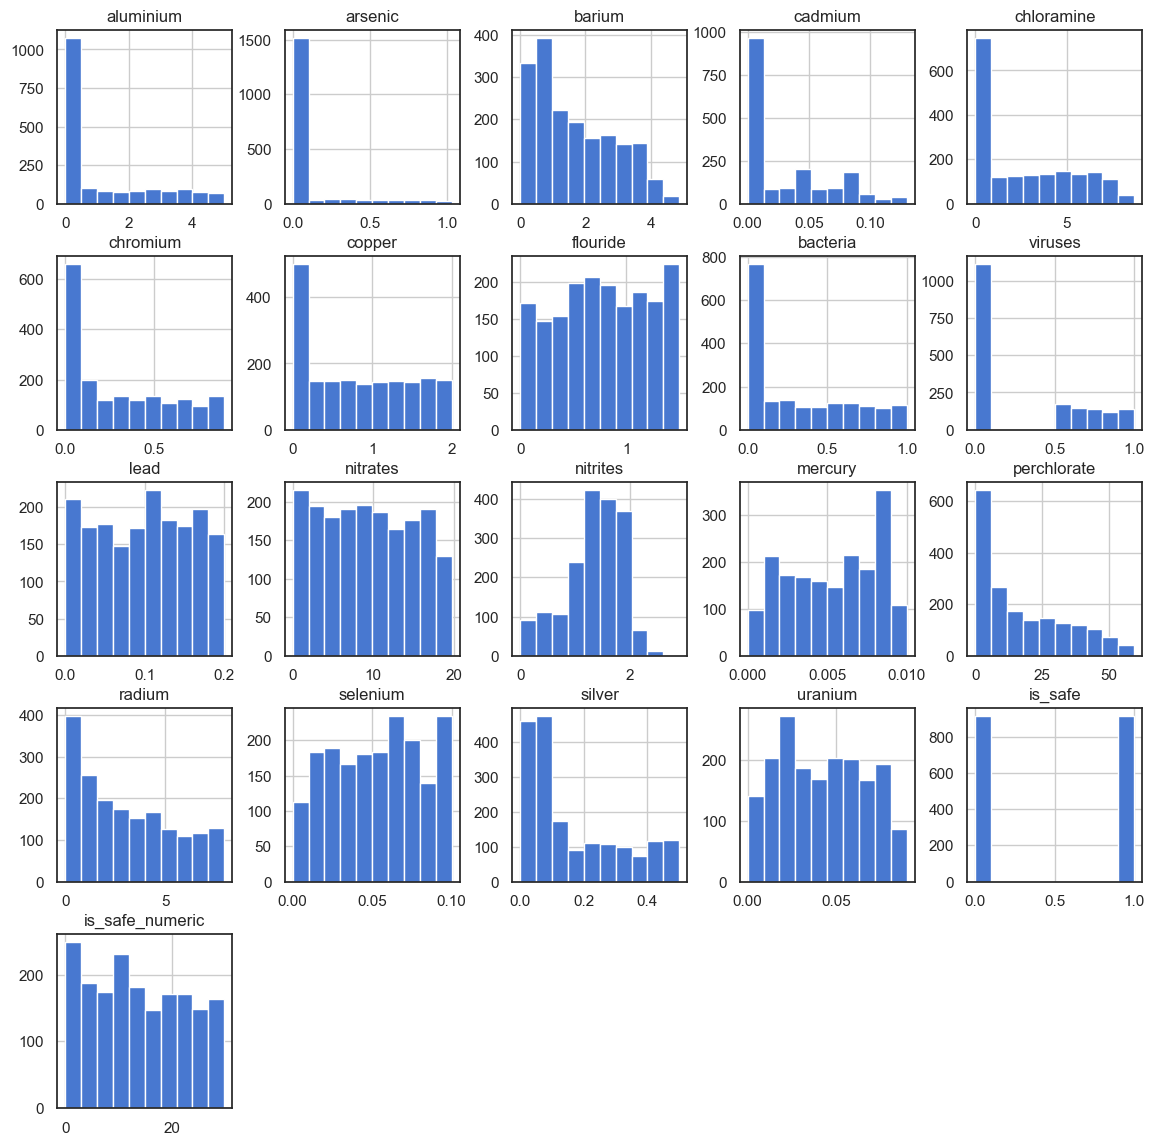

In [33]:
import matplotlib.pyplot as plt
df.hist(figsize=(14, 14))
plt.show()

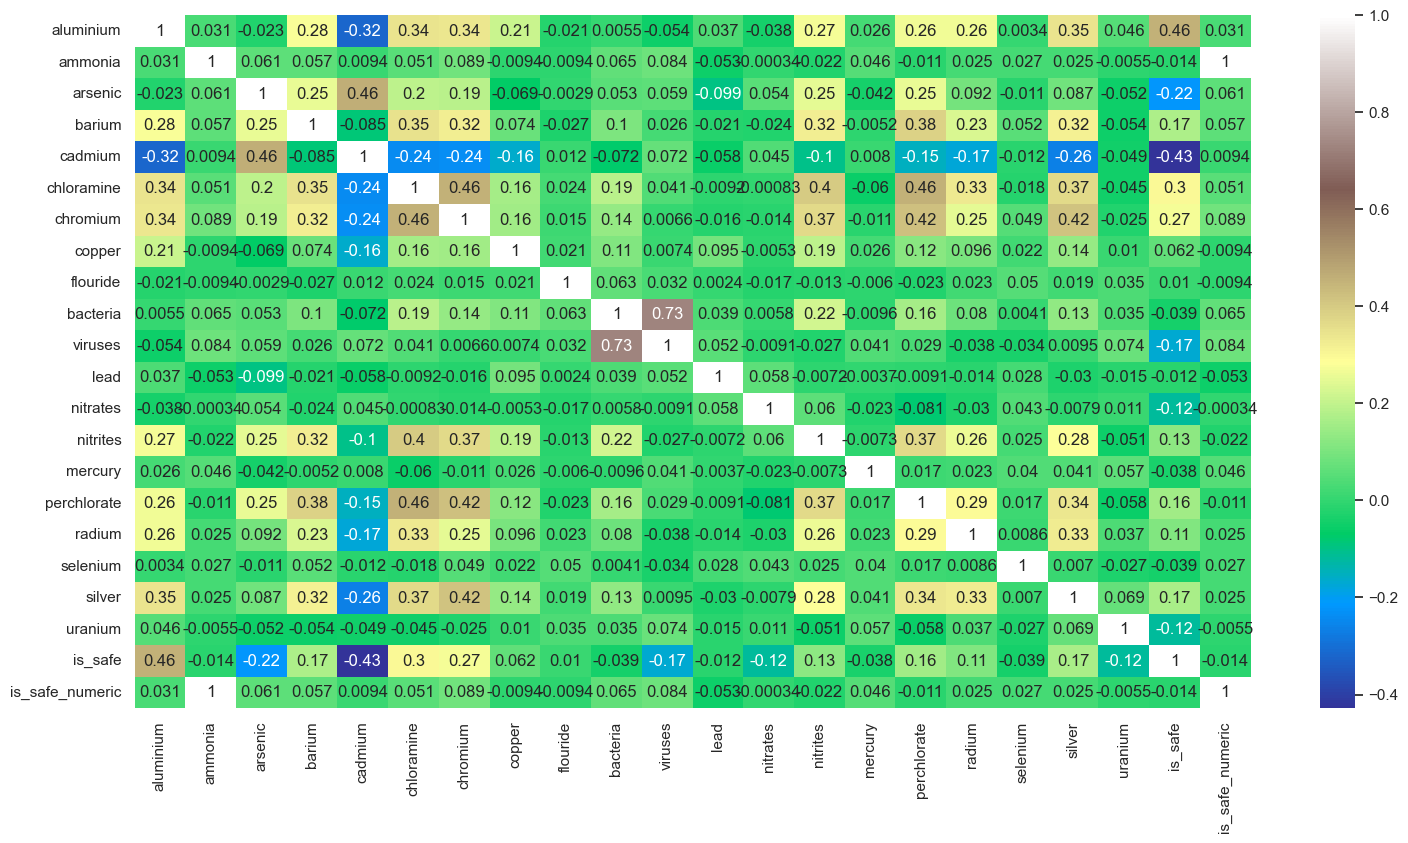

In [35]:
import seaborn as sns
plt.figure(figsize=(18, 9))
sns.heatmap(df.corr(), annot=True, cmap='terrain')
plt.show()

In [36]:
from sklearn.model_selection import train_test_split

# Split the data into x and y variables
x = df.drop('is_safe', axis=1)
y = df['is_safe']

# Split the data into train and test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1)

In [37]:
# Importing the model GaussianNB
from sklearn.naive_bayes import GaussianNB

# Training the model
nb = GaussianNB()
nb = nb.fit(xtrain, ytrain)
nb_y_pred = nb.predict(xtest)

# Verifying the results 
print(f"Acertou {(ytest == nb_y_pred).sum()} de {len(xtest)} ")

Acertou 421 de 548 


In [38]:
# Importing the model KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Training the model
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn = knn.fit(xtrain, ytrain)
knn_y_pred = knn.predict(xtest)

# Verifying the results 
print(f"Acertou {(ytest == knn_y_pred).sum()} de {len(xtest)} ")

Acertou 372 de 548 


In [39]:
# Importing the model DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Training the model
dt = DecisionTreeClassifier(random_state=1)
dt = dt.fit(xtrain, ytrain)
dt_y_pred = dt.predict(xtest)

# Verifying the results 
print(f"Acertou {(ytest == dt_y_pred).sum()} de {len(xtest)} ")

Acertou 490 de 548 


In [40]:
from sklearn.metrics import classification_report

class_names = ['0', '1']

# Print classification_report for each model
print('Classification Report for GaussianNB:')
print(classification_report(ytest, nb_y_pred, target_names=class_names))

print('Classification Report for DecisionTreeClassifier:')
print(classification_report(ytest, dt_y_pred, target_names=class_names))

print('Classification Report for KNeighborsClassifier:')
print(classification_report(ytest, knn_y_pred, target_names=class_names))

Classification Report for GaussianNB:
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       272
           1       0.77      0.78      0.77       276

    accuracy                           0.77       548
   macro avg       0.77      0.77      0.77       548
weighted avg       0.77      0.77      0.77       548

Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       272
           1       0.89      0.90      0.90       276

    accuracy                           0.89       548
   macro avg       0.89      0.89      0.89       548
weighted avg       0.89      0.89      0.89       548

Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.70      0.61      0.65       272
           1       0.66      0.75      0.70       276

    accuracy                           0.68   